## <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:120%;text-align:center;border-radius:10px 10px;">Kmeans clustering from scratch</p>

In [2]:
import numpy as np
import pandas as pd

## <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:120%;text-align:center;border-radius:10px 10px;">Model code</p>

In [ ]:
import numpy as np
from typing import Tuple, List

class Kmeans:
    """
    One of the Clustering methods part of unsupervised models.
    """
    def __init__(
        self, 
        n_clucters: int, 
        iteration: int = 500, 
        eval_metric: str = "inertia", 
        n_kmenas: int = 100
    ):
        """
        :param n_cluster: number of clusters should use.
        :param iteration: number of time the kmeans should work on the given data.
        :param eval_metric: Evaluation metric to qualify the clusters. 
        :param n_kmens: run the kmeans this much time to get the best clusters.
        """
        self.c = None  ## Centroid points value
        self.m = None  ## number of samples
        self.n = None  ## number of features
        self.n_clusters = n_clucters
        self.max_iteration = iteration
        self.eval_metrix = eval_metric
        self.n_kmeans = n_kmenas
        
    def _init_clusters(self, X: np.ndarray) -> np.ndarray:
        """ 
        Initialize the centroids randomly.
        
        :param X: np.ndarray of shape (m, n)
        :return: np.ndarray of centroids (k, n)
        """
        centroid_points = np.random.choice(range(0, self.m), self.n_clusters, replace=False)
        return X[centroid_points].astype("float")

    def _assign_cluster(self, 
                        X: np.ndarray, 
                        centroids: np.ndarray
                       ) -> np.ndarray:
        """
        Assign each sample to the closest cluster center.
        
        :param X: np.ndarray (m, n)
        :param centroids: np.ndarray (k, n)
        :return: np.ndarray (m,) label for each point
        """
        distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, 
                          X: np.ndarray, 
                          labels: np.ndarray
                         ) -> np.ndarray:
        """
        Compute new centroid positions.
        
        :param X: np.ndarray (m, n)
        :param labels: np.ndarray (m,)
        :return: np.ndarray (k, n)
        """
        new_centroids = np.zeros((self.n_clusters, self.n))
        for k in range(self.n_clusters):
            cluster_pts = X[labels == k]
            if len(cluster_pts) > 0:
                new_centroids[k] = cluster_pts.mean(axis=0)
        return new_centroids

    def _find_inertia(self, 
                      X: np.ndarray, 
                      centroids: np.ndarray, 
                      labels: np.ndarray
                     ) -> float:
        """
        Find inertia: Sum of distances between each point and its centroid.
        
        :param X: np.ndarray (m, n)
        :param centroids: np.ndarray (k, n)
        :param labels: np.ndarray (m,)
        :return: float inertia value
        """
        return np.sum(np.linalg.norm(X - centroids[labels], axis=1))

    def _evalute(self, 
                 X: np.ndarray, 
                 centroids: np.ndarray, 
                 labels: np.ndarray, 
                 eval_metric: str
                ) -> float:
        """
        Evaluate clustering quality based on metric.
        
        :return: float evaluation value
        """
        if eval_metric == "inertia":
            return self._find_inertia(X, centroids, labels)
        return 0.0

    def single_train(self, 
                     X: np.ndarray
                    ) -> Tuple[float, np.ndarray, np.ndarray]:
        """
        Train KMeans once.
        
        :param X: np.ndarray (m, n)
        :return: (inertia, centroids, labels)
        """
        X = np.array(X)
        self.m, self.n = X.shape

        centroids = self._init_clusters(X)
        print("initial centroids", centroids)
        
        for _ in range(self.max_iteration):
            labels = self._assign_cluster(X, centroids)
            print("x_centroids", labels)

            new_centroids = self._update_centroids(X, labels)
            print("current centroid", new_centroids, "previous centroid", centroids)

            if np.allclose(new_centroids, centroids):
                break
            
            centroids = new_centroids
        
        inertia = self._evalute(X, centroids, labels, self.eval_metrix)
        return inertia, centroids, labels

    def train(self,  X: np.ndarray) -> np.ndarray:
        """
        Run KMeans n_kmeans times and return best cluster labels.
        
        :param X: np.ndarray (m, n)
        :return: np.ndarray labels (m,)
        """
        best_inertia = float("inf")
        best_centroids = None
        best_labels = None

        for km in range(self.n_kmeans):
            print("{:=^100}".format(" Training new kmeans "), "--->", km)

            inertia, centroids, labels = self.single_train(X)
            print("Evaluation metric of this kmeans --->", inertia)

            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids
                best_labels = labels

        self.centroids = best_centroids
        return best_labels


In [40]:
data = np.array([[1,2], [3,4] ,[6,6], [7,8], [2,3], [4,2], [8,8] , [9,6]])
data = pd.DataFrame(data)
kmeans = Kmeans(n_clucters=2, n_kmenas=1)
kmeans.train(X=data)


======================================= Training new kmeans ========================================---->0
initial centroids [[4. 2.]
 [1. 2.]]
x_centroids [1 0 0 0 1 0 0 0]
current centroid [[6.16666667 5.66666667]
 [1.5        2.5       ]] previou centroid [[4. 2.]
 [1. 2.]]
x_centroids [1 0 0 0 1 0 0 0]
current centroid [[6.16666667 5.66666667]
 [1.5        2.5       ]] previou centroid [[4. 2.]
 [1. 2.]]
x_centroids [1 0 0 0 1 0 0 0]
current centroid [[6.16666667 5.66666667]
 [1.5        2.5       ]] previou centroid [[4. 2.]
 [1. 2.]]
x_centroids [1 0 0 0 1 0 0 0]
current centroid [[6.16666667 5.66666667]
 [1.5        2.5       ]] previou centroid [[4. 2.]
 [1. 2.]]
x_centroids [1 0 0 0 1 0 0 0]
current centroid [[6.16666667 5.66666667]
 [1.5        2.5       ]] previou centroid [[4. 2.]
 [1. 2.]]
x_centroids [1 0 0 0 1 0 0 0]
current centroid [[6.16666667 5.66666667]
 [1.5        2.5       ]] previou centroid [[4. 2.]
 [1. 2.]]
x_centroids [1 0 0 0 1 0 0 0]
current centroid [[6.1

array([1, 0, 0, 0, 1, 0, 0, 0])

# tc and sc

Here is the **Time Complexity (TC)** and **Space Complexity (SC)** for **each method in your KMeans class** and the **overall algorithm** — written clean, simple, and accurate.

---

###  ⭐ **Notation**

Let:

* **m** = number of samples
* **n** = number of features
* **k** = number of clusters
* **i** = max iterations
* **r** = number of repeated runs (`n_kmeans`)

---

### ✅ **1. `_init_clusters(X)`**

#### **Time Complexity**

* Randomly selecting `k` indices → **O(k)**

#### **Space Complexity**

* Stores `k × n` centroid matrix → **O(k · n)**

---

### ✅ **2. `_assign_cluster(X, centroids)`**

This computes distance between every sample and every centroid using broadcasting.

#### **Time Complexity**

Distance matrix shape → `(m × k × n)`
Norm reduction → `(m × k)`

So:

**TC = O(m · k · n)**

#### **Space Complexity**

Stores distance matrix `(m × k)`:

**SC = O(m · k)**

---

### ✅ **3. `_update_centroids(X, labels)`**

For each cluster, compute mean of all points assigned to it.

#### **Time Complexity**

Scanning all points once → **O(m · n)**
(Regardless of number of clusters)

#### **Space Complexity**

Stores new centroid matrix `(k × n)`:

**SC = O(k · n)**

---

### ✅ **4. `_find_inertia(X, centroids, labels)`**

Compute distance of each sample to its centroid.

#### **Time Complexity**

Distance for each point → **O(m · n)**

#### **Space Complexity**

No extra large structures:

**SC = O(1)**

---

### ⭐ **5. `_evalute`**

Only calls inertia.

#### **TC = O(m · n)**

#### **SC = O(1)**

---

### ⭐ **6. `single_train(X)` — ONE full KMeans run**

Each iteration does:

1️⃣ `_assign_cluster` → **O(m · k · n)**
2️⃣ `_update_centroids` → **O(m · n)**

Assign step dominates, so:

#### **TC per iteration = O(m · k · n)**

#### **TC for i iterations = O(i · m · k · n)**

Space used:

* Distance matrix → **O(m · k)**
* Centroids → **O(k · n)**
* Labels → **O(m)**

So:

#### **SC = O(m · k + k · n + m)**

Simplified:

#### ⭐ **SC = O(m · k + k · n)**

---

### ⭐ **7. `train(X)` — running KMeans multiple times**

You repeat `single_train` **r times** (`n_kmeans` runs).

#### **Time Complexity**

```
TC_total = r · (i · m · k · n)
```

#### **Space Complexity**

Space does NOT multiply with runs.

So:

**SC_total = O(m · k + k · n)**

Same as single run.

---

### 🎯 **Final Summary Table**

| Method                              | Time Complexity          | Space Complexity     |
| ----------------------------------- | ------------------------ | -------------------- |
| `_init_clusters`                    | **O(k)**                 | **O(k · n)**         |
| `_assign_cluster`                   | **O(m · k · n)**         | **O(m · k)**         |
| `_update_centroids`                 | **O(m · n)**             | **O(k · n)**         |
| `_find_inertia`                     | **O(m · n)**             | **O(1)**             |
| `_evalute`                          | **O(m · n)**             | **O(1)**             |
| **`single_train` (one KMeans run)** | **O(i · m · k · n)**     | **O(m · k + k · n)** |
| **`train` (r runs)**                | **O(r · i · m · k · n)** | **O(m · k + k · n)** |

---

### ⭐ One-Line Takeaways

* **Most expensive part**: distance computation `(m × k × n)`
* **Overall time**: grows linearly with **iterations**, **clusters**, **features**, and **repetitions**
* **Space**: dominated by the distance matrix `(m × k)` and centroids `(k × n)`

---

If you want, I can also produce:
✅ A graphical diagram of the complexities
✅ A fully vectorized version to reduce TC
✅ KMeans++ version with complexity

Just tell me!


Here is the **simple explanation** of what this line does **with a tiny example** so you understand it clearly:

```python
distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
```

---

### ⭐ What this line is doing

It computes the **distance from every sample to every centroid** in **one shot** (vectorized).

#### Output shape = `(num_samples, num_centroids)`

Each cell = distance(sample_i, centroid_j)

---

## ⭐ Small Example (VERY SIMPLE)

Let’s say:

#### Samples (X):

```
X = [[1, 1],
     [4, 2]]
```

So `m = 2` samples.

#### Centroids:

```
C = [[1, 2],
     [5, 1],
     [3, 3]]
```

So `k = 3` centroids.

---

## ⭐ What shapes become with broadcasting?

#### 1️⃣ `X[:, None]`

Adds a dimension:

```
X[:, None] =
[
   [[1,1]],
   [[4,2]]
]
Shape → (2,1,2)
```

#### 2️⃣ `centroids[None, :]`

Adds a dimension:

```
centroids[None, :] =
[
   [[1,2],
    [5,1],
    [3,3]]
]
Shape → (1,3,2)
```

---

## ⭐ 3️⃣ Subtract them (broadcasting)

```
X[:,None] - centroids[None,:] =
[
  [ [1-1, 1-2], [1-5, 1-1], [1-3, 1-3] ],
  [ [4-1, 2-2], [4-5, 2-1], [4-3, 2-3] ]
]
```

Which is:

```
[
  [ [0,-1],
    [-4, 0],
    [-2,-2] ],
  [ [3, 0],
    [-1, 1],
    [1,-1] ]
]
```

Shape → `(2, 3, 2)`
= 2 samples × 3 centroids × 2 features

---

## ⭐ 4️⃣ Now compute L2 norm on axis=2 (last dimension)

Take norm of each pair:

#### For sample X[0] = [1,1]:

* dist to C0: norm([0,-1]) = 1
* dist to C1: norm([-4, 0]) = 4
* dist to C2: norm([-2,-2]) = √8 ≈ 2.83

#### For sample X[1] = [4,2]:

* dist to C0: norm([3, 0]) = 3
* dist to C1: norm([-1,1]) = √2 ≈ 1.41
* dist to C2: norm([1,-1]) = √2 ≈ 1.41

---

## ⭐ Final Output (`distances`)

```
distances =
[
  [1.00, 4.00, 2.83],
  [3.00, 1.41, 1.41]
]
```

---

## ⭐ Meaning

This matrix says:

* Sample 0 is closest to centroid 0
* Sample 1 is closest to centroid 1 or 2 (tie)

---

## ⭐ One-Line Summary

**This line computes all distances between all samples and all centroids efficiently using broadcasting instead of slow loops.**

---

If you want, I can also show:
✅ Same example with pictures
✅ How broadcasting shapes match
✅ How k-means assigns clusters using `argmin`


In [35]:
a = np.array([
   [[1,1]],
   [[4,2]]
])

a.shape

(2, 1, 2)

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:120%;text-align:center;border-radius:10px 10px;">Load data</p>

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns


## don't need y here 
X, y = make_blobs(n_samples=50, centers=3, n_features=2,
                   random_state=0)



# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Find cluster using sklearn k-means</p>

In [13]:
from sklearn.cluster import KMeans as kMeans_sklearn
kmean_sklearn = kMeans_sklearn(n_clusters=3)
cluter = kmean_sklearn.fit_predict(X)

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Plot the clusters</p>

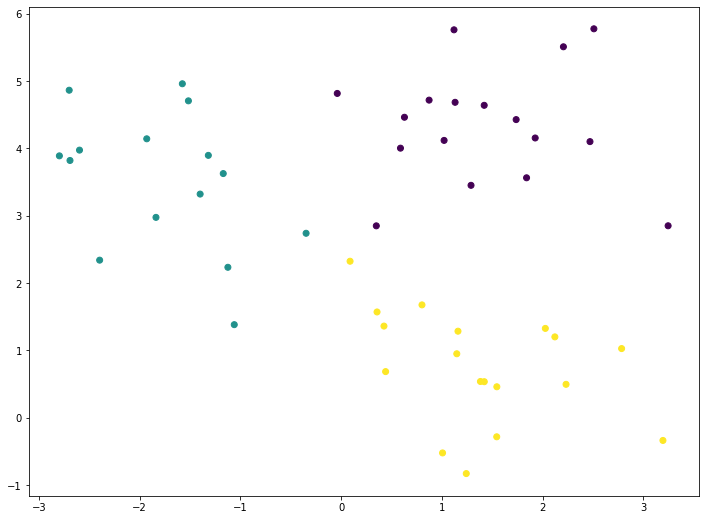

In [ ]:
#print(X)
## plot the dataset
plt.figure(figsize=(12,9))
plt.scatter(x=X[:, 0], y=X[:, 1], c=cluter)

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Kmeans based on my own model :) </p>

======================================= Training new kmeans ========================================---->0
Evaluation metric of this kmeans ---> 52.71973811055067
======================================= Training new kmeans ========================================---->1
Evaluation metric of this kmeans ---> 52.71973811055067
======================================= Training new kmeans ========================================---->2
Evaluation metric of this kmeans ---> 52.71973811055067
======================================= Training new kmeans ========================================---->3
Evaluation metric of this kmeans ---> 52.71973811055067
======================================= Training new kmeans ========================================---->4
Evaluation metric of this kmeans ---> 52.73057753672986
======================================= Training new kmeans ========================================---->5
Evaluation metric of this kmeans ---> 52.73057753672986
======================

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


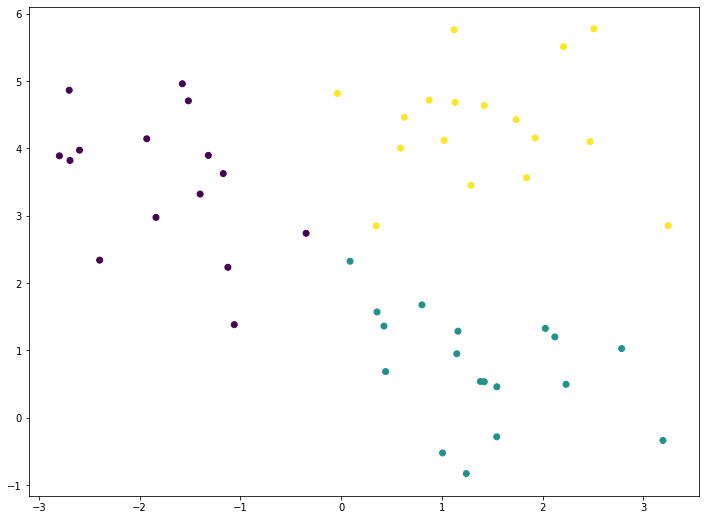

In [15]:
kmeans = Kmeans(n_clucters=3, n_kmenas=10)
y_pred = kmeans.train(X)

#plot the cluster based on my own Kmeans model
plt.figure(figsize=(12,9))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y_pred)
print(y_pred)

## <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Both are 99% same :) :) -- My model is clustering well </p>

**<span style="color:#5811D3;"> If you like this Notebook -- please do upvote</span>**

**<span style="color:#5811D3;">If you have any questions -- Comment it</span>**


<img src='https://c.tenor.com/npsLhz89w5AAAAAC/yes-i-did-it-success.gif'>

you can also check....
## <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Supervised Machine Learning models scratch series.... </p>



- 1) Linear Regression         ---> https://www.kaggle.com/ninjaac/linear-regression-from-scratch
- 2) Lasso Regression          ---> https://www.kaggle.com/ninjaac/lasso-ridge-regression 
- 3) Ridge Regression          ---> https://www.kaggle.com/ninjaac/lasso-ridge-regression 
- 4) ElasticNet Regression     ---> https://www.kaggle.com/ninjaac/elasticnet-regression 
- 5) Polynomail Regression     ---> https://www.kaggle.com/ninjaac/polynomial-and-polynomialridge-regression 
- 5) PolynomailRidge Regression---> https://www.kaggle.com/ninjaac/polynomial-and-polynomialridge-regression 
- 6) KNN Classifier            ---> https://www.kaggle.com/ninjaac/knnclassifier-from-scratch 

## <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Unsupervised Machine learning models .... </p>

- 1) Kmeans                    ---> https://www.kaggle.com/ninjaac/scratch-kmeans-from-scratch (Same Notebook you are looking now)
- 2) Hierartical clustering ------ loading


# Test

In [ ]:
import numpy as np
from typing import Tuple, List

class Kmeans:
    """
    One of the Clustering methods part of unsupervised models.
    """
    def __init__(
        self, 
        n_clucters: int, 
        iteration: int = 500, 
        n_kmenas: int = 100
    ):
        self.c = None  ## Centroid points value
        self.m = None  ## number of samples
        self.n = None  ## number of features
        self.n_clusters = n_clucters
        self.max_iteration = iteration
        self.n_kmeans = n_kmenas
    
    def _initalize_centroids(self, X:np.ndarray):
        center_points = np.random.choice(range(0, self.m), self.n_clusters, replace=False)
        return X[center_points]
    
    def _find_cluster(self, X):
        distance = np.linalg.norm(X[:, None] - self.c[None, :], axis=2)
        return np.argmin(distance, axis=1)
    
    def _update_centroids(self, X, labels):
        new_centrods = np.zeros((self.n_clusters, self.n))
        for cluster in range(self.n_clusters):
            cluster_data = X[labels == cluster]
            if len(cluster_data) > 1:
                new_centrods[cluster] = np.mean(cluster_data, axis=0)
        return new_centrods
    
    def _const_function(self, X, centroids, labels):
        cost = 0.0
        for cluster in range(self.n_clusters):
            cluster_points = X[labels == cluster]
            if len(cluster_points) > 0:
                cost += np.sum(np.square(cluster_points - centroids[cluster]))
        return cost

    def train_single(self, X):
        self.m, self.n = X.shape
        self.c = self._initalize_centroids(X)
        # select the centriods
        for i in range(self.max_iteration):
            labels = self._find_cluster(X)

            # find hte labels - find the nearest centroids
            new_centroids = self._update_centroids(X, labels)
            # udates the centroids - mean of the clster points
            # if no change in old and new - break
            if np.allclose(self.c, new_centroids):
                break

            # print the interia - WCSS
            cost = self._const_function(X, new_centroids, labels)
            if i % 100 == 0:
                print(f"iteration {i} -> cost {cost}")
            # change the centroid.
            self.c = new_centroids

        return cost, self.c, labels

    def train(self):
        best_interia = float("inf")
        best_centroids = None
        best_labels = None
        for i in range(self.n_kmeans):
            print("{:=^100}".format(" Training new kmeans "), "--->", km)

            inertia, centroids, labels = self.single_train(X)
            print("Evaluation metric of this kmeans --->", inertia)
        
        if inertia < best_interia:
            best_interia = inertia
            best_centroids = centroids
            best_labels = labels

        return labels



In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns



In [11]:

## don't need y here 
X, y = make_blobs(n_samples=50, centers=3, n_features=2,
                   random_state=0)

kmeans = Kmeans(n_clucters=3, n_kmenas=1)
kmeans.train_single(X)


array([[ 1.86393236,  0.32819808],
       [ 0.81507033,  3.34460935],
       [-2.13651184,  3.95489127]])